Import Dependencies

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import datasets, layers, models

Load the Dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train

In [4]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
y_train[0:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

Defining the class labels

In [30]:
classes = ["0","1","2","3","4","5","6","7","8","9"]

Normalizing the Data

In [8]:
X_train = X_train / 255
X_test = X_test / 255

Building the ANN

In [18]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2677 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1162 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0812 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0617 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0485 - accuracy: 0.9848


In [19]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0791 - accuracy: 0.9759


[0.07908014953136444, 0.9758999943733215]

Evaluate the Performance of the ANN Based Model

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.98      0.97      0.98       892
           6       0.97      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Building the CNN

In [15]:
cnn = models.Sequential([
    # First Layer of convolution
    layers.Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Followed by max pooling
    layers.MaxPooling2D((2, 2)),
    # Flatten out all layers
    # Feed To ANN
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1792 - accuracy: 0.9466
Epoch 2/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0600 - accuracy: 0.9822
Epoch 3/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0414 - accuracy: 0.9870
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0215 - accuracy: 0.9934


Evaluate the Model

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0451 - accuracy: 0.9843


[0.04512105882167816, 0.9843000173568726]

Evaluate the performance of the cnn based model

In [21]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [26]:
import matplotlib.pyplot as plt
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

def predict_cnn_output(index):
  y_pred = cnn.predict(X_test)
  y_classes = [np.argmax(element) for element in y_pred]
  print("Prediction", classes[y_classes[index]])
  print("Actual")
  plot_sample(X_test, y_test, index)

313/313 [==============================] - 2s 7ms/step
Prediction 0
Actual


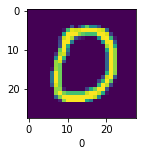

In [31]:
predict_cnn_output(10)